This notebook runs and analyzes the passive cells without a script.

In [1]:
import sys
sys.path.append("../")
sys.path.append("../Modules/")

from Modules.simulation import Simulation
from Modules.cell_builder import SkeletonCell, CellBuilder
from Modules.constants import HayParameters

import os
from neuron import h

from logger import Logger # type: ignore

import numpy as np

--No graphics will be displayed.


In [2]:
# initialize simulation object and parameters
sim = Simulation(SkeletonCell.Hay)
parameters = HayParameters(sim_name = 'test', h_tstop= 1000, all_synapses_off=True)

In [3]:
try:
    os.system("rm -r x86_64/")
except:
    pass

rm: cannot remove 'x86_64/': No such file or directory


In [4]:
%cd ../scripts

/home/drfrbc/Neural-Modeling/scripts


In [5]:
os.system(f"nrnivmodl {sim.cell_type.value['modfiles']} > /dev/null 2>&1")

h.load_file('stdrun.hoc')
h.nrn_load_dll('./x86_64/.libs/libnrnmech.so')

1.0

In [6]:
from Modules.morph_reduction_utils import get_reduced_cell

In [7]:
os.mkdir(sim.path)
parameters.path = os.path.join(sim.path, parameters.sim_name)

In [8]:
os.mkdir(parameters.path)

In [9]:
logger = Logger(None)
cell_builder = CellBuilder(sim.cell_type, parameters, logger)

In [10]:
complex_cell, _ = cell_builder.build_cell()
reduced_branches, _, _ = get_reduced_cell(cell_builder, reduce_tufts = True, reduce_obliques = True, reduce_basals=1)
reduced_2nd_branches, _, _ = get_reduced_cell(cell_builder, reduce_tufts = True, reduce_obliques = True, reduce_basals=2)
reduced_3rd_branches, _, _ = get_reduced_cell(cell_builder, reduce_tufts = True, reduce_obliques = True, reduce_basals=3)
reduced_4th_branches, _, _ = get_reduced_cell(cell_builder, reduce_tufts = True, reduce_obliques = True, reduce_basals=4)
reduced_5th_branches, _, _ = get_reduced_cell(cell_builder, reduce_tufts = True, reduce_obliques = True, reduce_basals=5)
reduced_trees, _, _ = get_reduced_cell(cell_builder, reduce_apic = True, reduce_basals=True)

cells = {
    'Complex': complex_cell,
    'Reduced Tufts, Obliques, Basals': reduced_branches,
    'Reduced Tufts, Obliques, 2ndary Basals': reduced_2nd_branches,
    'Reduced Tufts, Obliques, 3rdary Basals': reduced_3rd_branches,
    'Reduced Tufts, Obliques, 4thary Basals': reduced_4th_branches,
    'Reduced Tufts, Obliques, 5thary Basals': reduced_5th_branches,
    'Reduced Apical Tree, Basals': reduced_trees
}

# # shortcut to some older versions

# complex_cell, _ = cell_builder.build_cell()
# reduced_cell_tufts, original_seg_data, all_deleted_seg_indices = get_reduced_cell(cell_builder, reduce_tufts = True, reduce_obliques = False)
# reduced_cell_obliques, original_seg_data, all_deleted_seg_indices = get_reduced_cell(cell_builder, reduce_tufts = False, reduce_obliques = True)
# reduced_cell_basals, original_seg_data, all_deleted_seg_indices = get_reduced_cell(cell_builder, reduce_basals = True)
# # reduced_cell_tufts_basals, original_seg_data, all_deleted_seg_indices = get_reduced_cell(cell_builder, reduce_tufts = True, reduce_basals = True, reduce_obliques = False)
# reduced_cell_tufts_basals_obliques, original_seg_data, all_deleted_seg_indices = get_reduced_cell(cell_builder, reduce_tufts = True, reduce_basals = True, reduce_obliques = True)
# # reduced_cell_tufts_obliques, original_seg_data, all_deleted_seg_indices = get_reduced_cell(cell_builder, reduce_tufts = True, reduce_basals = False, reduce_obliques = True)
# # reduced_cell_basals_obliques, original_seg_data, all_deleted_seg_indices = get_reduced_cell(cell_builder, reduce_tufts = False, reduce_basals = True, reduce_obliques = True)
# # reduce_cell_all_apic, _, _ = get_reduced_cell(cell_builder, reduce_apic = True, reduce_basals = True)
# cells = {
#     'Complex':complex_cell,
#     'Reduced Tufts':reduced_cell_tufts,
#     'Reduced Basals':reduced_cell_basals,
#     'Reduced Obliques':reduced_cell_obliques,
#     # 'Reduced Tufts and Basals':reduced_cell_tufts_basals,
#     # 'Reduced Tufts and Obliques':reduced_cell_tufts_obliques,
#     # 'Reduced Basals and Obliques':reduced_cell_basals_obliques,
#     'Reduced Tufts, Basals, Obliques': reduced_cell_tufts_basals_obliques
#     # 'Reduced Basals, entire Apical': reduce_cell_all_apic
# }

(2024-07-05 14:09:47.573668)-[PID: 1071388]–[INFO]: Building SkeletonCell.Hay.
(2024-07-05 14:09:47.821337)-[PID: 1071388]–[INFO]: Not building synapses.
(2024-07-05 14:09:47.822344)-[PID: 1071388]–[INFO]: Finished creating a CellModel object.
(2024-07-05 14:09:47.822375)-[PID: 1071388]–[INFO]: Finish building in 0.24912762641906738
(2024-07-05 14:09:47.822788)-[PID: 1071388]–[INFO]: Building SkeletonCell.Hay.
(2024-07-05 14:09:48.034015)-[PID: 1071388]–[INFO]: Not building synapses.
(2024-07-05 14:09:48.036092)-[PID: 1071388]–[INFO]: Finished creating a CellModel object.
(2024-07-05 14:09:48.036121)-[PID: 1071388]–[INFO]: Finish building in 0.21356558799743652
Removing duplicate coordinate at index 1 in section L5PCtemplate[1].apic[0]


There is no segment to segment copy, it means that some segments in thereduced model did not receive channels from the original cell.Trying to compensate by copying channels from neighboring segments
There is no segment to segment copy, it means that some segments in thereduced model did not receive channels from the original cell.Trying to compensate by copying channels from neighboring segments


(2024-07-05 14:10:04.830535)-[PID: 1071388]–[INFO]: Building SkeletonCell.Hay.
(2024-07-05 14:10:05.042318)-[PID: 1071388]–[INFO]: Not building synapses.
(2024-07-05 14:10:05.044583)-[PID: 1071388]–[INFO]: Finished creating a CellModel object.
(2024-07-05 14:10:05.044614)-[PID: 1071388]–[INFO]: Finish building in 0.21431183815002441
Removing duplicate coordinate at index 1 in section L5PCtemplate[2].apic[0]


There is no segment to segment copy, it means that some segments in thereduced model did not receive channels from the original cell.Trying to compensate by copying channels from neighboring segments
There is no segment to segment copy, it means that some segments in thereduced model did not receive channels from the original cell.Trying to compensate by copying channels from neighboring segments


(2024-07-05 14:10:26.224345)-[PID: 1071388]–[INFO]: Building SkeletonCell.Hay.
(2024-07-05 14:10:26.439955)-[PID: 1071388]–[INFO]: Not building synapses.
(2024-07-05 14:10:26.442596)-[PID: 1071388]–[INFO]: Finished creating a CellModel object.
(2024-07-05 14:10:26.442628)-[PID: 1071388]–[INFO]: Finish building in 0.2185194492340088
Removing duplicate coordinate at index 1 in section L5PCtemplate[3].apic[0]


There is no segment to segment copy, it means that some segments in thereduced model did not receive channels from the original cell.Trying to compensate by copying channels from neighboring segments
There is no segment to segment copy, it means that some segments in thereduced model did not receive channels from the original cell.Trying to compensate by copying channels from neighboring segments


(2024-07-05 14:10:52.548268)-[PID: 1071388]–[INFO]: Building SkeletonCell.Hay.
(2024-07-05 14:10:52.760390)-[PID: 1071388]–[INFO]: Not building synapses.
(2024-07-05 14:10:52.763377)-[PID: 1071388]–[INFO]: Finished creating a CellModel object.
(2024-07-05 14:10:52.763409)-[PID: 1071388]–[INFO]: Finish building in 0.21537089347839355
Removing duplicate coordinate at index 1 in section L5PCtemplate[4].apic[0]


There is no segment to segment copy, it means that some segments in thereduced model did not receive channels from the original cell.Trying to compensate by copying channels from neighboring segments
There is no segment to segment copy, it means that some segments in thereduced model did not receive channels from the original cell.Trying to compensate by copying channels from neighboring segments


(2024-07-05 14:11:21.118729)-[PID: 1071388]–[INFO]: Building SkeletonCell.Hay.
(2024-07-05 14:11:21.332000)-[PID: 1071388]–[INFO]: Not building synapses.
(2024-07-05 14:11:21.335578)-[PID: 1071388]–[INFO]: Finished creating a CellModel object.
(2024-07-05 14:11:21.335611)-[PID: 1071388]–[INFO]: Finish building in 0.21711397171020508
Removing duplicate coordinate at index 1 in section L5PCtemplate[5].apic[0]


There is no segment to segment copy, it means that some segments in thereduced model did not receive channels from the original cell.Trying to compensate by copying channels from neighboring segments
There is no segment to segment copy, it means that some segments in thereduced model did not receive channels from the original cell.Trying to compensate by copying channels from neighboring segments


(2024-07-05 14:11:46.804560)-[PID: 1071388]–[INFO]: Building SkeletonCell.Hay.
(2024-07-05 14:11:47.017265)-[PID: 1071388]–[INFO]: Not building synapses.
(2024-07-05 14:11:47.021390)-[PID: 1071388]–[INFO]: Finished creating a CellModel object.
(2024-07-05 14:11:47.021422)-[PID: 1071388]–[INFO]: Finish building in 0.2171032428741455
Removing duplicate coordinate at index 1 in section L5PCtemplate[6].apic[0]


There is no segment to segment copy, it means that some segments in thereduced model did not receive channels from the original cell.Trying to compensate by copying channels from neighboring segments


In [11]:
for cell_name, cell in cells.items():
    sim.set_all_recorders(cell, parameters)

Removing duplicate coordinate at index 1 in section L5PCtemplate[0].apic[0]


In [12]:
# initialize current injections
for cell_name, cell in cells.items():
    cell.set_injection(amp = 0, dur = 1950, delay = 50, target='soma')

In [13]:
import Modules.analysis as analysis

(2024-07-05 14:11:59.331427)-[PID: 1071388]–[INFO]: Starting simulation.
(2024-07-05 14:12:02.972293)-[PID: 1071388]–[INFO]: Saving data at step: 2500
(2024-07-05 14:12:02.986664)-[PID: 1071388]–[INFO]: Finished writing data
(2024-07-05 14:12:02.987282)-[PID: 1071388]–[INFO]: Finished clearing recorders
(2024-07-05 14:12:06.703638)-[PID: 1071388]–[INFO]: Saving data at step: 5000
(2024-07-05 14:12:06.717504)-[PID: 1071388]–[INFO]: Finished writing data
(2024-07-05 14:12:06.718128)-[PID: 1071388]–[INFO]: Finished clearing recorders
(2024-07-05 14:12:10.430043)-[PID: 1071388]–[INFO]: Saving data at step: 7500
(2024-07-05 14:12:10.442718)-[PID: 1071388]–[INFO]: Finished writing data
(2024-07-05 14:12:10.443299)-[PID: 1071388]–[INFO]: Finished clearing recorders
(2024-07-05 14:12:14.184749)-[PID: 1071388]–[INFO]: Saving data at step: 10000
(2024-07-05 14:12:14.198028)-[PID: 1071388]–[INFO]: Finished writing data
(2024-07-05 14:12:14.198661)-[PID: 1071388]–[INFO]: Finished clearing recorder

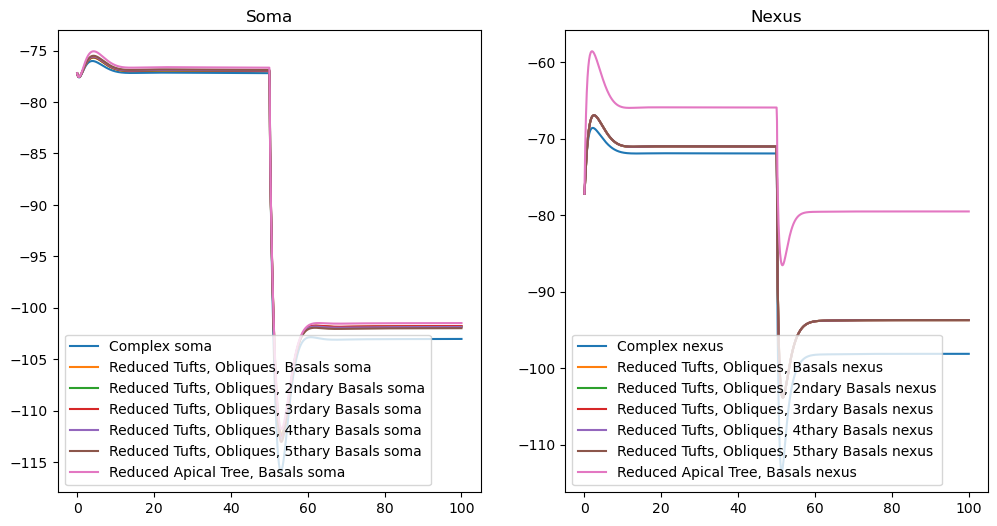

In [14]:
# input resistance & membrane time constant
from scripts.compare_input_resistance import calc_input_resistance, calc_time_constant
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil
import pickle
import numpy as np
import matplotlib.pyplot as plt
import csv

root_path = parameters.path
FI_paths = []
parameters.h_tstop = 1000
parameters.h_i_duration = 500
parameters.h_i_delay = 500
parameters.save_every_ms = 250
amps = [-1]

# Creating a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # figsize is adjustable based on your preference

# Initialize a list to hold the DataFrame data
data = []
h.v_init = -77
h.finitialize(h.v_init)

for use_nexus in [False, True]:
    for cell_name, cell in cells.items():
        for amp in amps:
            dir_suffix = 'nexus' if use_nexus else 'soma'
            parameters.path = f"{root_path}/{cell_name}_Rin_{dir_suffix}_{amp:.1f}"
            os.makedirs(parameters.path, exist_ok=True)
            
            with open(os.path.join(parameters.path, "parameters.pickle"), "wb") as file:
                pickle.dump(parameters, file)
            FI_paths.append(parameters.path)
            parameters.h_i_amplitude = amp
            cell.current_injection.amp = amp
            cell.current_injection.dur = parameters.h_i_duration
            cell.current_injection.delay = parameters.h_i_delay
            if use_nexus:
                nexus_segment = cell.find_nexus_seg()
                segments, _ = cell.get_segments(['all'])
                if nexus_segment is None:
                    nexus_segment = segments.index(cell.apic[0](0.4))
                cell.current_injection.loc(segments[nexus_segment])
            
            sim.simulate(cell, parameters)
            print(cell_name, parameters.path)
            
            v = analysis.DataReader.read_data(parameters.path, "v", parameters=parameters)
            id_to_use = nexus_segment if use_nexus else 0
            
            # Select the appropriate axis based on whether the nexus is used
            ax = ax2 if use_nexus else ax1
            ax.plot(np.arange(0, len(v[id_to_use])) * parameters.h_dt, v[id_to_use], label=f"{cell_name} {'nexus' if use_nexus else 'soma'}")
            
            soma_spikes = analysis.DataReader.read_data(parameters.path, "soma_spikes")
            Rin = calc_input_resistance(parameters.path, id_to_use)
            tau = calc_time_constant(parameters.path, id_to_use)

            # Append data to the list
            if use_nexus:
                # For nexus data, find the corresponding cell in the list and update
                for entry in data:
                    if entry['Cell Name'] == cell_name:
                        entry['Nexus Input Resistance (MOhm)'] = Rin
                        entry['Nexus Time Constant (MOhm)'] = tau
            else:
                # For somatic data, create a new entry
                data.append({
                    'Cell Name': cell_name,
                    'Somatic Input Resistance (MOhm)': Rin,
                    'Somatic Time Constant (ms)': tau,
                    'Nexus Input Resistance (MOhm)': None,
                    'Nexus Time Constant (ms)': None
                })


            # # Save simulation data to CSV
            # sim_data = pd.DataFrame({'Time': np.arange(0, len(v[id_to_use])) * parameters.h_dt, 'Voltage': v[id_to_use]})
            # sim_data.to_csv(os.path.join(parameters.path, "simulation_data.csv"), index=False)

# Create DataFrame from collected data
df = pd.DataFrame(data)
print(df)

# Add legends and titles
ax1.set_title('Soma')
ax1.legend()
ax2.set_title('Nexus')
ax2.legend()

plt.show()

# Cleanup directories
for FI_path in FI_paths:
    shutil.rmtree(FI_path)
    
# Reset for future simulations
for cell_name, cell in cells.items():
    cell.current_injection.amp = 0
parameters.save_every_ms = 1000
parameters.path = root_path


Note: there is a slight possiblity that the nexus seg index for reduced apical tree is wrong.

In [15]:
df

,Cell Name,Somatic Input Resistance (MOhm),Somatic Time Constant (ms),Nexus Input Resistance (MOhm),Nexus Time Constant (ms),Nexus Time Constant (MOhm)
0,Complex,25.884745,7,26.195810,None,3
1,"Reduced Tufts, Obliques, Basals",24.858141,7,22.681160,None,3
2,"Reduced Tufts, Obliques, 2ndary Basals",24.877652,7,22.684653,None,3
3,"Reduced Tufts, Obliques, 3rdary Basals",24.862312,7,22.688400,None,3
4,"Reduced Tufts, Obliques, 4thary Basals",24.987385,7,22.697094,None,3
5,"Reduced Tufts, Obliques, 5thary Basals",25.155692,7,22.707942,None,3
6,"Reduced Apical Tree, Basals",24.874436,7,13.590713,None,3


In [16]:
j=0
for i in df['Somatic Input Resistance (MOhm)']:
    print(i-j)
    j=i

25.884744694714
-1.0266039417776796
0.01951153011741269
-0.015340713014822427
0.12507368831239773
0.16830636542361788
-0.2812555361204119
